# Hierarchical Clustering from Scratch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

class HierarchicalClustering:
    def __init__(self, linkage='complete'):
        self.linkage = linkage

    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(np.array(point1) - np.array(point2))

    def calculate_distance_matrix(self, data):
        return squareform(pdist(data, metric='euclidean'))

    def complete_linkage(self, distance_matrix, cluster_indices):
        min_distance = np.inf
        closest_clusters = None
        for i in range(len(cluster_indices)):
            for j in range(i + 1, len(cluster_indices)):
                max_distance = max(distance_matrix[x, y] for x in cluster_indices[i] for y in cluster_indices[j])
                if max_distance < min_distance:
                    min_distance = max_distance
                    closest_clusters = (i, j)
        return closest_clusters, min_distance

    def single_linkage(self, distance_matrix, cluster_indices):
        min_distance = np.inf
        closest_clusters = None
        for i in range(len(cluster_indices)):
            for j in range(i + 1, len(cluster_indices)):
                min_dist = min(distance_matrix[x, y] for x in cluster_indices[i] for y in cluster_indices[j])
                if min_dist < min_distance:
                    min_distance = min_dist
                    closest_clusters = (i, j)
        return closest_clusters, min_distance

    def average_linkage(self, distance_matrix, cluster_indices):
        min_distance = np.inf
        closest_clusters = None
        for i in range(len(cluster_indices)):
            for j in range(i + 1, len(cluster_indices)):
                avg_distance = np.mean([distance_matrix[x, y] for x in cluster_indices[i] for y in cluster_indices[j]])
                if avg_distance < min_distance:
                    min_distance = avg_distance
                    closest_clusters = (i, j)
        return closest_clusters, min_distance

    def centroid_linkage(self, cluster_indices, data):
        min_distance = np.inf
        closest_clusters = None
        for i in range(len(cluster_indices)):
            for j in range(i + 1, len(cluster_indices)):
                centroid_i = np.mean([data[x] for x in cluster_indices[i]], axis=0)
                centroid_j = np.mean([data[x] for x in cluster_indices[j]], axis=0)
                centroid_dist = self.euclidean_distance(centroid_i, centroid_j)
                if centroid_dist < min_distance:
                    min_distance = centroid_dist
                    closest_clusters = (i, j)
        return closest_clusters, min_distance

    def fit(self, data):
        distance_matrix = self.calculate_distance_matrix(data)
        cluster_indices = [[i] for i in range(len(data))]
        merges = []  
        cluster_sizes = {i: 1 for i in range(len(data))}
        cluster_id = len(data)
        
        while len(cluster_indices) > 1:
            if self.linkage == 'complete':
                closest_clusters, min_distance = self.complete_linkage(distance_matrix, cluster_indices)
            elif self.linkage == 'single':
                closest_clusters, min_distance = self.single_linkage(distance_matrix, cluster_indices)
            elif self.linkage == 'average':
                closest_clusters, min_distance = self.average_linkage(distance_matrix, cluster_indices)
            elif self.linkage == 'centroid':
                closest_clusters, min_distance = self.centroid_linkage(cluster_indices, data)
            else:
                raise ValueError(f"Linkage type '{self.linkage}' is not supported")
            
            if closest_clusters is None:
                break
            
            i, j = closest_clusters
            new_cluster = cluster_indices[i] + cluster_indices[j]
            new_cluster_size = cluster_sizes[i] + cluster_sizes[j]
            merges.append((i, j, min_distance, new_cluster_size))
            
            del cluster_indices[max(i, j)]
            del cluster_indices[min(i, j)]
            cluster_indices.append(new_cluster)
            
            cluster_sizes[cluster_id] = new_cluster_size
            cluster_id += 1
        
        return merges, cluster_indices


In [45]:
def generate_data(num_clusters, points_per_cluster, spread):
    centers = np.random.rand(num_clusters, 2) * 10 # Küme merkezleri için rastgele değerler
    data = []
    for i in range(num_clusters):
        # Merkez etrafında dağılmış rastgele noktalar
        points = centers[i] + np.random.randn(points_per_cluster, 2) * spread
        data.extend(points)
    return np.array(data)


# Veri Üretimi
num_clusters = 4 # Küme sayısı
points_per_cluster = 50 # Her kümedeki nokta sayısı
spread = 1.5  # Dağılım parametresi
data = generate_data(num_clusters, points_per_cluster, spread)

In [46]:
hc = HierarchicalClustering(linkage='average')
merges, cluster_indices = hc.fit(data)


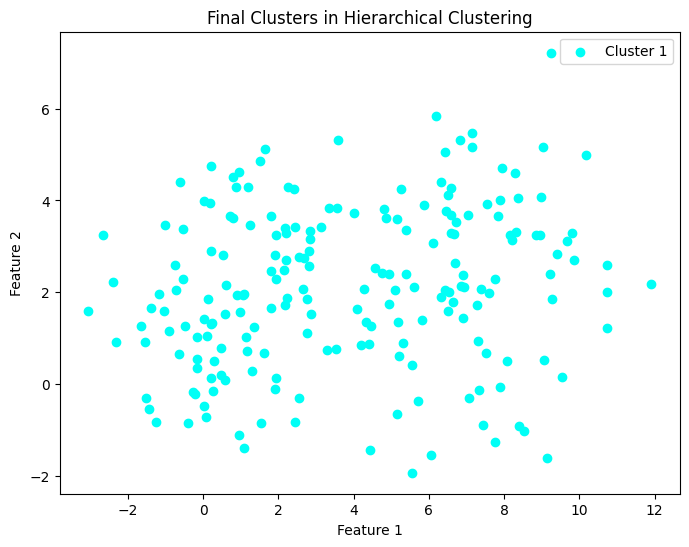

In [48]:

colors = sns.color_palette("hsv", len(cluster_indices))

plt.figure(figsize=(8, 6))
for i, cluster in enumerate(cluster_indices):
    cluster_points = data[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f"Cluster {i+1}")

plt.title("Final Clusters in Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
